## Data Wrangling for WeRateDog


## Table of Contents
- [Introduction](#intro)
- [Part I - Data](#Data)
- [Part II - Gathering](#Gathering)
- [Part III - Accessing](#Accessing)
- [Part IV - Cleaning](#Cleaning)
- [Part V - Analyzing](#Analyzing)
- [Part VI - Conclusion](#Conclusion)



<a id='intro'></a>
### Introduction

The dataset wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators almost always greater than 10. 11/10, 12/10, 13/10, etc. WeRateDogs has over 4 million followers and has received international media coverage.

<a id='Data'></a>
#### Part I - Data


- WeRateDogs Twitter archive （twitter-archive-enhanced.csv）
- tweet image predictions (image_predictions.tsv)
- Query from API (tweet_json.txt)

<a id='Gathering'></a>
#### Part II - Gathering
To get started, let's import our libraries.

In [616]:
import pandas as pd
import numpy as np

import requests #download data
import tweepy #twitter api
import json #handle json data
import re #text processing

import matplotlib.pyplot as plt
import seaborn as sb 
%matplotlib inline

##### 1. WeRateDogs Twitter archive （twitter-archive-enhanced.csv）

In [452]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### 2. tweet image predictions （image_predictions.tsv）

In [453]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open('image_predictions.tsv', 'wb').write(response.content)

335079

In [454]:
df_predict = pd.read_csv("image_predictions.tsv", sep='\t')
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### 3. Query from API (tweet_json.txt)

In [455]:
lists = '{ "data":['
count = 0
with open('tweet_json.txt') as file:
    for line in file:
    
        if(count == 0):
            lists += line + '\n'
        else:
            lists += ',' + line + '\n'
        count += 1
lists += '] }'
with open('tweet_json.txt', 'w') as file:
    file.write(lists)
data = ''
with open('tweet_json.txt') as file:
    data = json.load(file)


In [456]:
pd.DataFrame.from_dict(data)
#df['retweet_count'] = data['id'].apply(lambda x: x.get('retweet_count'))
data.keys()

dict_keys(['data'])

In [457]:
tweets_info = []
test = data['data']
for data_entry in data['data']:
    tweets_info.append({
        'tweet_id':data_entry['id_str'],
        'retweet_count': data_entry['retweet_count'], 
        'favorite_count':data_entry['favorite_count'], 
        'follower_count': data_entry['user']['followers_count']
                        })


In [458]:
df_tweets_info = pd.DataFrame(tweets_info, columns = ['tweet_id', 'retweet_count', 'favorite_count','follower_count'])
df_tweets_info

,tweet_id,retweet_count,favorite_count,follower_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


<a id='Accessing'></a>
#### Part III - Accessing


#### 1. df_predict columns:
Total of 2075 rows and 12 columns, with no infomation lost 

- tweet_id: tweet_id is the last part of the tweet URL after "status/"
- jpg_url: Image link or URL
- img_num: Image number
- p1: p1 is the algorithm's #1 prediction for the image in the tweet
- p1_conf: p1_conf is how confident the algorithm is in its #1 prediction
- p1_dog: p1_dog is whether or not the #1 prediction is a breed of dog
- p2: is the algorithm's second most likely prediction
- p2_conf: is how confident the algorithm is in its #2 prediction
- p2_dog: is whether or not the #2 prediction is a breed of dog
- p3: p3 is the algorithm's #3 prediction for the image in the tweet
- p3_conf: p3_conf is how confident the algorithm is in its #3 prediction
- p3_dog: p3_dog is whether or not the #3 prediction is a breed of dog

In [459]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [460]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [461]:
sum(df_predict.duplicated())

0

In [462]:
df_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1030,711306686208872448,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,1,leatherback_turtle,0.280835,False,loggerhead,0.123290,False,Dandie_Dinmont,0.086792,True
1963,867051520902168576,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True
1262,748977405889503236,https://pbs.twimg.com/media/CmTm-XQXEAAEyN6.jpg,1,German_short-haired_pointer,0.742216,True,bluetick,0.152810,True,English_setter,0.051835,True
521,676575501977128964,https://pbs.twimg.com/media/CWOt07EUsAAnOYW.jpg,1,feather_boa,0.424106,False,Yorkshire_terrier,0.073144,True,Shetland_sheepdog,0.057598,True
993,708119489313951744,https://pbs.twimg.com/media/CdO-6x5W8AENSBJ.jpg,1,Norwich_terrier,0.264483,True,Norfolk_terrier,0.258786,True,chow,0.096899,True


#### 2. df_twitter columns:
Total of 2356 rows and 17 columns, with some infomation lost 

- tweet_id: the unique identifier for each tweet
- in_reply_to_status_id: the status id for the reply given to the tweet id
- in_reply_to_user_id: the status id for the reply given to the user id 
- timestamp: Date and time the tweet was created, in Excel-friendly format.
- source: the web link as source
- text: the corresponding tweets text
- retweeted_status_id: the status id for the reply given to the tweet id 
- retweeted_status_user_id: the status id for the tweeted given to the user id 
- retweeted_status_timestamp: Date and time the retweet was created
- expanded_urls: Expanded version of ur1
- rating_numerator: the rating given by the user
- rating_denominator: The reference rating given by the user
- name: the breed or dog's name 
- doggo, floofer, pupper, puppo: the stage of the dog

In [463]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [464]:
sum(df_twitter.duplicated())

0

In [465]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 3. df_tweets_info columns:
Total of 2354 rows and 4 columns, with no infomation lost 

- tweet_id: tweet_id is the the unique identifier for each tweet
- retweet_count: the number of retweet for the posting
- favorite_count: the number of clicking favourite for the posting
- follower_count: the number of followers for the user who posting

In [466]:
df_tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   follower_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [467]:
sum(df_tweets_info.duplicated())

0

In [468]:
df_tweets_info.describe()

,retweet_count,favorite_count,follower_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


In [469]:
df_tweets_info

,tweet_id,retweet_count,favorite_count,follower_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


#### Quality 
`df_tweets_info` table
- slightly some infomation missing compared to df_twitter

`df_predict` table
- datatype of `tweet_id` need to be string
- `p1,p2,p3` columns contain upper and lower class
- smaller data sets compared to others 

`df_twitter` table
- datatype of `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` need to be string
- `timestamp`, `retweeted_status_timestamp` need to be date
- `None`, `NaN`, `nan` appears, which is unconsistency
- `name` is 'a', which is typo
- do not need retweet info
- `source` column contain html code (didn't do this one)

#### Tidiness 
- `doggo`, `floofe`, `pupper`, `puppo` can be transformed into one column in `df_twitter` table
- All three tables can be merged into one with primary key `tweet_id`

<a id='Cleaning'></a>
#### Part IV - Cleaning


In [1133]:
df_tweets_info_clean = df_tweets_info.copy()
df_twitter_clean = df_twitter.copy()
df_predict_clean = df_predict.copy()

#### p1, p2, p3 columns of `df_predict` contain lower and upper class
#### Define
`df_predict` table
- change all the letters in p1,p2,p3 columns to lowerclass



#### Code


In [1134]:
df_predict_clean['p1'] = df_predict_clean['p1'].str.lower()


In [1135]:
df_predict_clean['p2'] = df_predict_clean['p2'].str.lower()
df_predict_clean['p3'] = df_predict_clean['p3'].str.lower()


#### Test


In [1020]:
df_predict_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


#### Unconsistency appears in the datasets & Don't need retweet info
#### Define
`df_twitter` table
- change all 'None', 'Nan' 'a' to 'nan'
- drop the info about retweet

#### Code


In [1136]:
df_twitter_clean.replace('None', np.nan, inplace=True)

In [1137]:
df_twitter_clean.replace('NaN', np.nan, inplace=True)

In [1138]:
df_twitter_clean.replace('a', np.nan, inplace=True)

In [1139]:
df_twitter_clean = df_twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test


#### Tidiness: Merge three tables together
#### Define
- Merge three tables into one with primary key `tweet_id`

#### Code


In [1140]:
merge_2 = pd.merge(df_twitter_clean, df_predict_clean, on='tweet_id', how = 'inner')

df_tweets_info = df_tweets_info.astype({'tweet_id': int})
weratedog_clean = pd.merge(merge_2, df_tweets_info, on='tweet_id', how = 'inner')

#### Test


In [1026]:
weratedog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2073 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2073 non-null   object 
 4   source                 2073 non-null   object 
 5   text                   2073 non-null   object 
 6   expanded_urls          2073 non-null   object 
 7   rating_numerator       2073 non-null   int64  
 8   rating_denominator     2073 non-null   int64  
 9   name                   1441 non-null   object 
 10  doggo                  80 non-null     object 
 11  floofer                8 non-null      object 
 12  pupper                 221 non-null    object 
 13  puppo                  24 non-null     object 
 14  jpg_url                2073 non-null   object 
 15  img_

In [1027]:
sum(weratedog_clean.duplicated())

0

#### Tidiness: Melt four columns into one
#### Define
`df_twitter` table
- Transform `doggo`, `floofe`, `pupper`, `puppo` into one column 

After melting:
- duplicated problem happened. Need to delete the duplicated rows, with same id and timestamp to identify

#### Code


In [1141]:
weratedog_clean = pd.melt(weratedog_clean, id_vars =['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp',
                                                 'source','text','expanded_urls','rating_numerator','rating_denominator',
                                                 'name','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                                                 'p3_dog', 'retweet_count', 'favorite_count', 'follower_count', 'jpg_url', 'img_num'], 
                                               var_name = 'drop', value_name = 'state_of_dog')

In [1142]:
weratedog_clean = weratedog_clean.drop(['drop'],axis=1)

In [1143]:
weratedog_clean = weratedog_clean.drop_duplicates()  #there is duplicated happened

In [1144]:
weratedog_clean.shape

(2406, 25)

In [1145]:
weratedog_clean.tweet_id.value_counts()

770093767776997377    3
775898661951791106    3
854010172552949760    3
855851453814013952    3
759793422261743616    3
                     ..
672995267319328768    1
811744202451197953    1
841439858740625411    1
708109389455101952    1
879415818425184262    1
Name: tweet_id, Length: 2073, dtype: int64

- check the same id to see if the duplicated data need further investigate

In [1146]:
weratedog_clean.query('tweet_id == "770093767776997377"').timestamp

665     2016-08-29 03:00:36 +0000
2738    2016-08-29 03:00:36 +0000
4811    2016-08-29 03:00:36 +0000
Name: timestamp, dtype: object

In [1147]:
weratedog_clean.query('tweet_id == "770093767776997377"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,follower_count,jpg_url,img_num,state_of_dog
665,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,https://twitter.com/dog_rates/status/741067306...,12,10,just,...,True,kelpie,0.035711,True,3520,0,3200905,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,doggo
2738,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,https://twitter.com/dog_rates/status/741067306...,12,10,just,...,True,kelpie,0.035711,True,3520,0,3200905,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,NaN
4811,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,https://twitter.com/dog_rates/status/741067306...,12,10,just,...,True,kelpie,0.035711,True,3520,0,3200905,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,pupper


In [1035]:
weratedog_clean.query('tweet_id == "854010172552949760"').timestamp

160     2017-04-17 16:34:26 +0000
2233    2017-04-17 16:34:26 +0000
4306    2017-04-17 16:34:26 +0000
Name: timestamp, dtype: object

In [1148]:
weratedog_clean.query('tweet_id == "854010172552949760"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,follower_count,jpg_url,img_num,state_of_dog
160,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,...,True,border_collie,0.131706,True,3433,17169,3200892,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,doggo
2233,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,...,True,border_collie,0.131706,True,3433,17169,3200892,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,floofer
4306,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,...,True,border_collie,0.131706,True,3433,17169,3200892,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,NaN


In [1149]:
weratedog_clean.query('tweet_id == "855851453814013952"').timestamp

154     2017-04-22 18:31:02 +0000
2227    2017-04-22 18:31:02 +0000
6373    2017-04-22 18:31:02 +0000
Name: timestamp, dtype: object

In [1150]:
weratedog_clean.query('tweet_id == "672160042234327040"').timestamp

1739    2015-12-02 21:06:56 +0000
5885    2015-12-02 21:06:56 +0000
Name: timestamp, dtype: object

In [1039]:
weratedog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 7108
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2406 non-null   int64  
 1   in_reply_to_status_id  27 non-null     float64
 2   in_reply_to_user_id    27 non-null     float64
 3   timestamp              2406 non-null   object 
 4   source                 2406 non-null   object 
 5   text                   2406 non-null   object 
 6   expanded_urls          2406 non-null   object 
 7   rating_numerator       2406 non-null   int64  
 8   rating_denominator     2406 non-null   int64  
 9   name                   1640 non-null   object 
 10  p1                     2406 non-null   object 
 11  p1_conf                2406 non-null   float64
 12  p1_dog                 2406 non-null   bool   
 13  p2                     2406 non-null   object 
 14  p2_conf                2406 non-null   float64
 15  p2_d

- for the same id post, even the timestamps are the same
- basically because of the only different state of dog
- but we don't have a lot of data for state of dog, so keep it

#### Test


In [1151]:
weratedog_clean.state_of_dog.value_counts()

pupper     221
doggo       80
puppo       24
floofer      8
Name: state_of_dog, dtype: int64

In [1152]:
weratedog_clean.name.value_counts()

Cooper        13
Charlie       12
Oliver        12
Bo            11
Lucy          11
              ..
Mattie         1
Mabel          1
Cilantro       1
William        1
incredibly     1
Name: name, Length: 934, dtype: int64

In [1153]:
weratedog_clean['tweet_id'].value_counts()

770093767776997377    3
775898661951791106    3
854010172552949760    3
855851453814013952    3
759793422261743616    3
                     ..
672995267319328768    1
811744202451197953    1
841439858740625411    1
708109389455101952    1
879415818425184262    1
Name: tweet_id, Length: 2073, dtype: int64

In [1154]:
sum(weratedog_clean.duplicated())

0

#### Data Type
#### Define
merged table
- change datatype of tweet_id to string

merged table
- change datatype of tweet_id, in_reply_to_status_id, in_reply_to_user_id to string
- change `timestamp`, `retweeted_status_timestamp` to date


#### Code


In [1156]:
weratedog_clean = weratedog_clean.astype({'tweet_id': str, 'in_reply_to_status_id': str, 
                                            'in_reply_to_user_id': str})

In [1157]:
weratedog_clean['timestamp'] = pd.to_datetime(weratedog_clean['timestamp']) 


#### Test


In [1158]:
weratedog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 7108
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2406 non-null   object             
 1   in_reply_to_status_id  2406 non-null   object             
 2   in_reply_to_user_id    2406 non-null   object             
 3   timestamp              2406 non-null   datetime64[ns, UTC]
 4   source                 2406 non-null   object             
 5   text                   2406 non-null   object             
 6   expanded_urls          2406 non-null   object             
 7   rating_numerator       2406 non-null   int64              
 8   rating_denominator     2406 non-null   int64              
 9   name                   1640 non-null   object             
 10  p1                     2406 non-null   object             
 11  p1_conf                2406 non-null   float64          

<a id='Analyzing'></a>
#### Part V - Analyzing

In [1159]:
#store the data
weratedog_clean.to_csv('weratedog_clean.csv', index=False)

In [1160]:
weratedog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 7108
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2406 non-null   object             
 1   in_reply_to_status_id  2406 non-null   object             
 2   in_reply_to_user_id    2406 non-null   object             
 3   timestamp              2406 non-null   datetime64[ns, UTC]
 4   source                 2406 non-null   object             
 5   text                   2406 non-null   object             
 6   expanded_urls          2406 non-null   object             
 7   rating_numerator       2406 non-null   int64              
 8   rating_denominator     2406 non-null   int64              
 9   name                   1640 non-null   object             
 10  p1                     2406 non-null   object             
 11  p1_conf                2406 non-null   float64          

##### 1. what is the rate distribution of the posting dogs?

In [1401]:
base_color = sb.color_palette()[0]

In [1402]:
rate = (weratedog_clean['rating_numerator'] / weratedog_clean_1['rating_denominator']).round(2)

In [1403]:
weratedog_clean_1['rate'] = rate

In [1404]:
weratedog_clean_1['rate'].value_counts()

1.20      560
1.10      495
1.00      491
1.30      333
0.90      168
0.80      110
0.70       59
1.40       58
0.50       38
0.60       33
0.30       20
0.40       15
0.20       10
0.10        4
2.70        2
0.00        2
177.60      1
2.60        1
3.43        1
0.64        1
42.00       1
7.50        1
1.50        1
0.82        1
Name: rate, dtype: int64

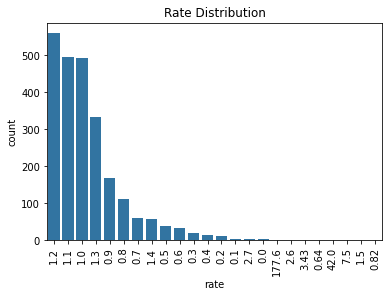

In [1411]:
rate_order = weratedog_clean_1['rate'].value_counts().index
ax = sb.countplot(data = weratedog_clean_1, x = 'rate', color = base_color, order = rate_order)
plt.xlabel('rate')
plt.xticks(rotation = 90)
plt.title('Rate Distribution');


> People gave really high score to the dogs, mostly above 1

##### 2. Is there any state of dog get higher rating?

In [1420]:
weratedog_clean_1['state_of_dog'].value_counts()

pupper     221
doggo       80
puppo       24
floofer      8
Name: state_of_dog, dtype: int64

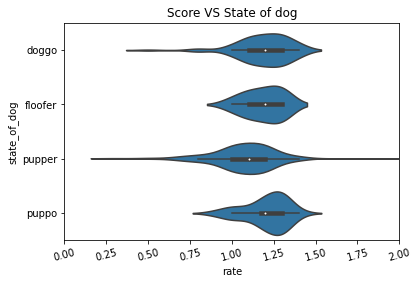

In [1435]:
sb.violinplot(data = weratedog_clean_1, y = 'state_of_dog', x = 'rate',color = base_color)
plt.xlim(0,2)
plt.xticks(rotation = 15)
plt.title('Score VS State of dog');

- a lot of puppo get higher score in general
- people have different taste toward pupper
- doggo and floofer in general have similar mean score for people

##### 3. Any relationship between  score and favorite_count?

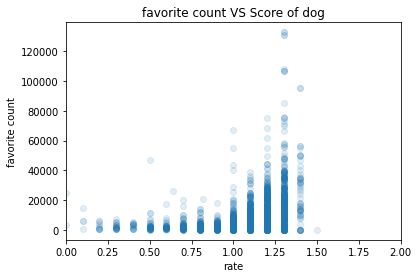

In [1437]:
plt.scatter(data = weratedog_clean_1, x = 'rate', y = 'favorite_count', alpha = 1/8)
# plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
plt.xlim(0,2)
plt.xlabel('rate')
plt.ylabel('favorite count')
plt.title('favorite count VS Score of dog');

- hard to tell from plot, we need to check out the regression coeff and p-value to see

In [1438]:
weratedog_clean_1 = weratedog_clean.copy()
#copy of the unscaling data

In [1440]:
#scale the data for further analyzing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
weratedog_clean[['favorite_count', 'rate','follower_count','retweet_count']] = scaler.fit_transform(weratedog_clean[['favorite_count', 'rate','follower_count','retweet_count']])


In [1441]:
import statsmodels.api as sms

weratedog_clean['intercept'] = 1

lm = sms.OLS(weratedog_clean['favorite_count'], weratedog_clean[['intercept','rate', 'follower_count','retweet_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1772.
Date:                Sun, 26 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:52:05   Log-Likelihood:                -2009.6
No. Observations:                2406   AIC:                             4027.
Df Residuals:                    2402   BIC:                             4050.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept      -2.253e-16      0.011  -1.98e-14      1.000      -0.022       0.022
rate              -0.0017      0.011     -0.147      0.883      -0.024       0.021
follower_count    -0.2289      0.012    -18.862      0.000      -0.253      -0.205
retweet_count      0.7225      0.012     59.545      0.000       0.699       0.746
==============================================================================
Omnibus:                     1811.556   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171173.961
Skew:                          -2.838   Prob(JB):                         0.00
Kurtosis:                      43.930   Cond. No.                         1.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Strong relationship between favorite count and follower_count,retweet_count, which makes sense
- From this analyzing, no relationship between favorite count and score to the dog

##### 4. which breed of dog is most puplar for posting based on the predicton?

In [1251]:
prediction = weratedog_clean[['p1','p2','p3','p1_dog','p2_dog','p3_dog']]
prediction

from collections import defaultdict
dogs = defaultdict(int)

for index, row in prediction.iterrows():
    if row.p1_dog:
        dogs[row.p1] += 1
    elif row.p2_dog:
        dogs[row.p2] += 1
    elif row.p3_dog:
        dogs[row.p3] += 1
#print(dogs)


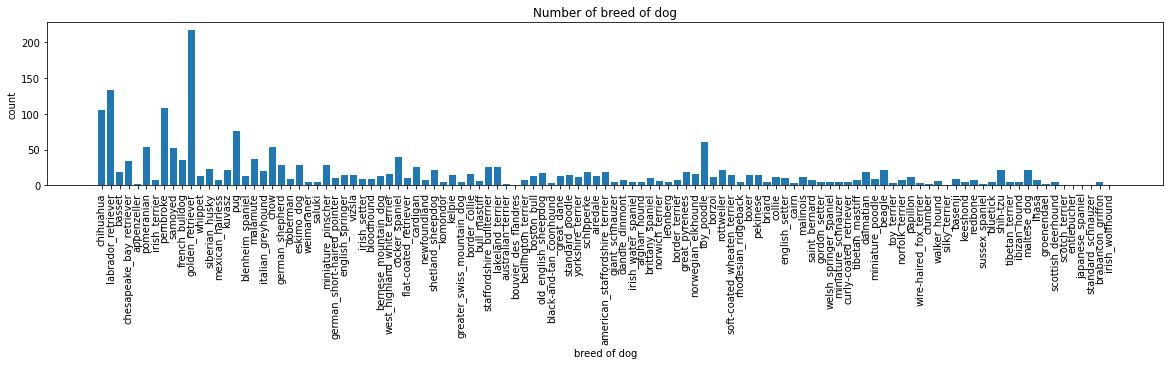

In [1325]:
plt.figure(figsize=(20, 3))

keys = dogs.keys()
values = dogs.values()
plt.bar(keys, values)
plt.xticks(rotation = 90)
plt.xlabel('breed of dog')
plt.ylabel('count')
plt.title('Number of breed of dog');

In [1277]:
ts = pd.DataFrame.from_dict(dogs,orient='index')
orders = ts[0].sort_values(ascending = False)
orders

golden_retriever      217
labrador_retriever    133
pembroke              108
chihuahua             105
pug                    76
                     ... 
scotch_terrier          1
entlebucher             1
japanese_spaniel        1
standard_schnauzer      1
irish_wolfhound         1
Name: 0, Length: 113, dtype: int64

- golden_retriever is the most popular breed of dog for posting to weeatedog id
- people like posting labrador_retriever, pembroke and chihuahua too

##### 5. Is the prediction accuracy from the observations fullfil the confident?

In [1275]:
p1_dog = weratedog_clean.p1_dog.sum()
p1_accuacy = p1_dog / weratedog_clean.p1_dog.count()
p1_accuacy

0.7398171238570241

In [1270]:
p1_conf = weratedog_clean.p1_conf.mean()
p1_conf

0.5980334637572735

In [1174]:
p2_dog = weratedog_clean.p2_dog.sum()
p2_accuacy = p2_dog / weratedog_clean.p2_dog.count()
p2_accuacy

0.7510390689941812

In [1266]:
p2_conf = weratedog_clean.p2_conf.mean()
p2_conf

0.1346620802191243

In [1173]:
p3_dog = weratedog_clean.p3_dog.sum()
p3_accuacy = p3_dog / weratedog_clean.p3_dog.count()
p3_accuacy

0.7223607647547797

In [1267]:
p3_conf = weratedog_clean.p3_conf.mean()
p3_conf

0.059649621127315464

In [1347]:
prediction = {'method': [1,2,3],
            'accuacy': [p1_accuacy,p2_accuacy,p3_accuacy],
              'confident': [p1_conf,p2_conf,p3_conf]
             }

pred = pd.DataFrame(prediction) 
pred

,method,accuacy,confident
0,1,0.739817,0.598033
1,2,0.751039,0.134662
2,3,0.722361,0.059650


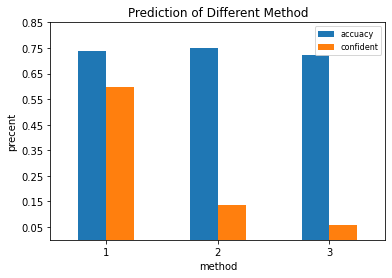

In [1443]:
ax = pred.plot.bar(x='method', y=['accuacy','confident'], rot=0)

plt.yticks(np.arange(0.05, 0.8 +0.1, 0.1))

plt.ylabel('precent')
plt.title('Prediction of Different Method')
plt.legend(prop={'size': 8} ,loc='upper right');

- From the observation, 2nd prediction is the most accurate one, even though it is not confident about its prediction
- Overall, all predictions do really good job

<a id='Conclusion'></a>
#### Part VI - Conclusion


We did the data weangling for scratch for this project. we asked some questions based on the score for the dog, the breed of the dog, favorate and retweet count of the posting. There are some limitations, for example, there might still some duplicated happend becase of the melting of the breed of dog, but since we don't have a lot of datasets, we decide to keep the original one and only drop the whole duplicated for further analyzing.